# Analysis of Hate Groups Data
We study the SLP data of Hate groups particularly focusing on **Anti-immigrant groups**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
hg = pd.read_csv('data/splc-hate-groups.csv')
hg.head(10)

,Title,City,State,Group,Ideology,Headquarters,Statewide,Year
0,American Border Patrol,Sierra Vista,Arizona,American Border Patrol/American Patrol,Anti-Immigrant,Yes,NaN,2019
1,American Immigration Control Foundation/Americ...,Monterey,Virginia,NaN,Anti-Immigrant,Yes,NaN,2019
2,Americans for Legal Immigration (ALIPAC),Raleigh,North Carolina,NaN,Anti-Immigrant,Yes,NaN,2019
3,AZ Patriots,NaN,Arizona,NaN,Anti-Immigrant,Yes,Yes,2019
4,Californians for Population Stabilization,Ventura,California,NaN,Anti-Immigrant,NaN,NaN,2019
5,Center for Immigration Studies,Washington,District of Columbia,Center for Immigration Studies,Anti-Immigrant,Yes,NaN,2019
6,Colorado Alliance for Immigration Reform,Lakewood,Colorado,NaN,Anti-Immigrant,Yes,NaN,2019
7,Federation for American Immigration Reform,Washington,District of Columbia,Federation for American Immigration Reform,Anti-Immigrant,Yes,NaN,2019
8,Floridians for Immigration Enforcement,Pompano Beach,Florida,NaN,Anti-Immigrant,NaN,NaN,2019
9,Help Save Maryland,Monkton,Maryland,NaN,Anti-Immigrant,Yes,NaN,2019


## 1. Looking at Hate Groups Over Time

In [3]:
counts = hg.groupby(['Year', 'Ideology']).size().reset_index(name='count')
top3 = counts.sort_values(by=['Year','count'], ascending=[True, False]).groupby('Year').head(3)

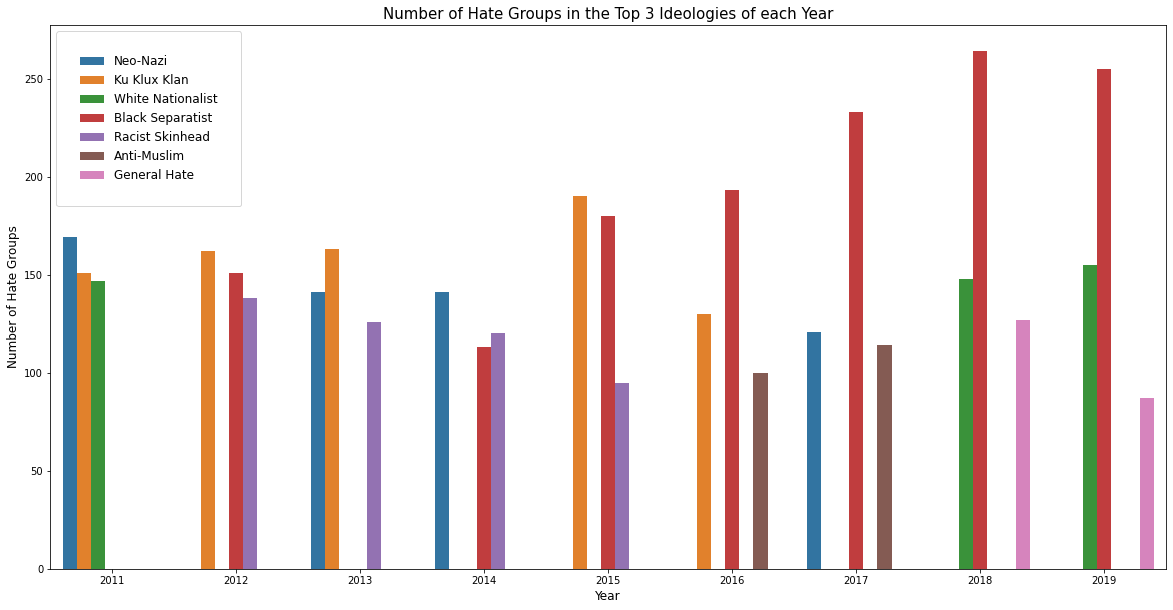

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="Year", y="count", hue='Ideology', data=top3[top3.Year > 2010])
ax.legend(loc='upper left', borderpad=2, prop={'size':12})
plt.title('Number of Hate Groups in the Top 3 Ideologies of each Year', size=15)
plt.ylabel('Number of Hate Groups', size=12)
plt.xlabel('Year', size=12)
plt.show()

### 1.1 Anti-Immigrant Groups

In [5]:
counts_im = counts[counts.Ideology == 'Anti-Immigrant']

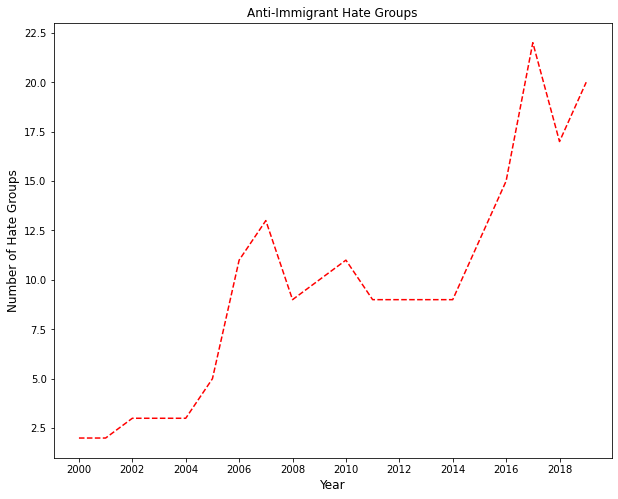

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.lineplot(x="Year", y="count", data=counts_im, 
                  color='red')
ax.lines[0].set_linestyle("--")
plt.ylabel('Number of Hate Groups', size=12)
freq = int(2)
ax.set_xticks(counts_im.Year[::freq])
plt.xlabel('Year', size=12)
plt.title('Anti-Immigrant Hate Groups')
plt.show()

In [7]:
hg_im = hg[hg.Ideology == 'Anti-Immigrant']

In [8]:
us = gpd.read_file('data/shapes/tl_2017_us_state.shp')
us = us[['STUSPS', 'GEOID', 'NAME', 'REGION', 'geometry']]
print(us.shape)
non_states = ['Commonwealth of the Northern Mariana Islands', 'Guam','Puerto Rico', 
              'American Samoa', 'United States Virgin Islands']
us = us.drop(us[us.apply(lambda x: True if x['NAME'] in non_states else False, axis=1)].index)
us.set_index('GEOID', inplace=True)
us_lim = us.drop(us[us.apply(lambda x: True if x['NAME'] in ['Alaska', 'Hawaii'] else False, axis=1)].index)

(56, 5)


In [10]:
counts = hg.groupby(['State', 'Year', 'Ideology']).size().reset_index(name='count')

In [20]:
counts_g = us_lim[['NAME', 'geometry']].merge(counts[(counts.Year == 2019) & 
                                                     (counts.Ideology == 'Anti-Immigrant')], 
                                              right_on='State', left_on='NAME', 
                                              how='left').fillna({'count':0})
counts_g['State'] = counts_g['NAME']
counts_g.drop(columns=['NAME'], inplace=True)

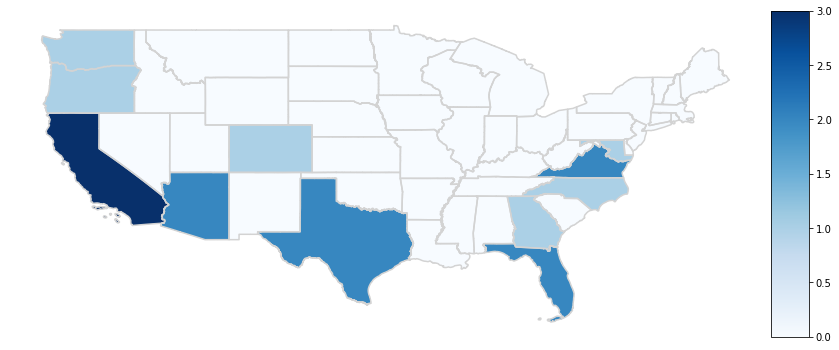

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(15,6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
counts_g.plot(column='count',cmap='Blues',legend=True,ax=ax, cax=cax)
counts_g.boundary.plot(color='lightgrey',ax =ax)
ax.axis('off')
plt.show()